In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

mpl.rc("figure", dpi=150)
mpl.rc("figure", figsize=(4,4))

plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'xtick.labelsize':15,
    'ytick.labelsize':15,
    'axes.labelsize':20,
})

import os
import re

In [2]:
# extra stuff
from matplotlib.ticker import FormatStrFormatter, ScalarFormatter
import math
from scipy.spatial import cKDTree  # For finding nearest neighbors

# formatting
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-2, 2))  # Sets limits for when to use scientific notation

In [3]:
# output directory
dir = '../data.lbm/src_17/'
# dir = '../src/17/output.lbm/'

# all ticks are found using regular expressions
files = os.listdir(dir)
ticks = []

pattern = r'fluidTrj_(\d+)\.csv'

for file in files:
    match = re.search(pattern, file)
    if match:
        ticks.append(int(match.group(1)))
        
ticks.sort()

print(ticks)


[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900, 10000]


# Fluido

In [35]:
tick = ticks[-1]
fluidDf = pd.read_csv(dir + f"fluidTrj_{tick}.csv").set_index(["id_x","id_y"]).sort_index()

fluidDf

tick    time  coordinate_x  coordinate_y  massDensity  \
id_x id_y                                                           
1    1     10000  1000.0         -15.0         -15.0          0.0   
     2     10000  1000.0         -15.0         -14.9          0.0   
     3     10000  1000.0         -15.0         -14.8          0.0   
     4     10000  1000.0         -15.0         -14.7          0.0   
     5     10000  1000.0         -15.0         -14.6          0.0   
...          ...     ...           ...           ...          ...   
301  297   10000  1000.0          15.0          14.6          0.0   
     298   10000  1000.0          15.0          14.7          0.0   
     299   10000  1000.0          15.0          14.8          0.0   
     300   10000  1000.0          15.0          14.9          0.0   
     301   10000  1000.0          15.0          15.0          0.0   

           fluidVelocity_x  fluidVelocity_y   f1   f2   f3   f4   f5   f6  \
id_x id_y                                                                   
1    1                 0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0   
     2                 0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0   
     3                 0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0   
     4                 0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0   
     5                 0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...                    ...              ...  ...  ...  ...  ...  ...  ...   
301  297               0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0   
     298               0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0   
     299               0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0   
     300               0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0   
     301               0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0   

            f7   f8   f9  
id_x id_y                 
1    1     0.0  0.0  0.0  
     2     0.0  0.0  0.0  
     3     0.0  0.0  0.0  
     4     0.0  0.0  0.0  
     5     0.0  0.0  0.0  
...        ...  ...  ...  
301  297   0.0  0.0  0.0  
     298   0.0  0.0  0.0  
     299   0.0  0.0  0.0  
     300   0.0  0.0  0.0  
     301   0.0  0.0  0.0  

[90601 rows x 16 columns]

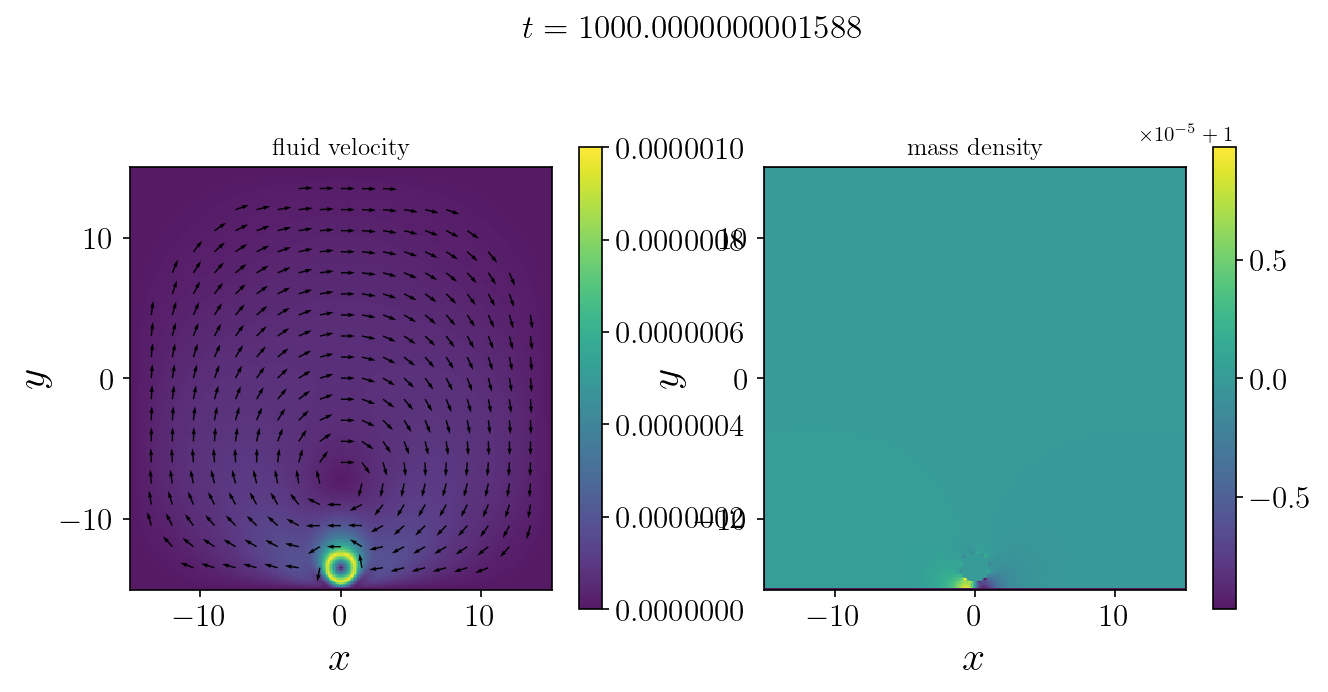

In [36]:
fig, axes = plt.subplots(1, 2, figsize = (10,5))

# Add a title for the whole figure
fig.suptitle(f"$t = {fluidDf.time.values[0]}$", fontsize=16)

# Create a meshgrid for plotting
x_unique = fluidDf['coordinate_x'].unique()
y_unique = fluidDf['coordinate_y'].unique()
X, Y = np.meshgrid(x_unique, y_unique)

cs = []

c = axes[0].pcolormesh(X, Y,
    np.sqrt(fluidDf.fluidVelocity_x**2 + fluidDf.fluidVelocity_y**2).unstack().values.transpose(),
    cmap = "viridis", alpha = 0.9
); cs.append(c);
axes[0].set_title('fluid velocity')

maskStep = int(len(x_unique)/20)
# Create a mask for filtering
mask = (fluidDf['coordinate_x'].isin(x_unique[::maskStep])) & (fluidDf['coordinate_y'].isin(y_unique[::maskStep])) & (
    (fluidDf.fluidVelocity_x**2 + fluidDf.fluidVelocity_y**2 > 1e-16)
)
# Filter the DataFrame
filtered_df = fluidDf[mask]

axes[0].quiver(
    filtered_df['coordinate_x'], 
    filtered_df['coordinate_y'], 
    (filtered_df.fluidVelocity_x / np.sqrt(filtered_df.fluidVelocity_x**2 + filtered_df.fluidVelocity_y**2)),
    (filtered_df.fluidVelocity_y / np.sqrt(filtered_df.fluidVelocity_x**2 + filtered_df.fluidVelocity_y**2)),
    scale = 30,
)

c = axes[1].pcolormesh(X,Y,
    fluidDf.massDensity.unstack().values.transpose(),
    vmin=min(fluidDf.query("massDensity > 1e-2").massDensity.values),
    cmap = "viridis", alpha = 0.9
); cs.append(c);
axes[1].set_title('mass density')

for i in range(2):
    ax = axes.flatten()[i]
    c = cs[i]
    ax.set_aspect('equal')
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    cbar = fig.colorbar(c, ax=ax, shrink=.8)
    cbar.ax.yaxis.set_major_formatter(formatter)
    cbar.ax.yaxis.get_offset_text().set_fontsize(10)  # Adjust the font size if necessary

plt.show()

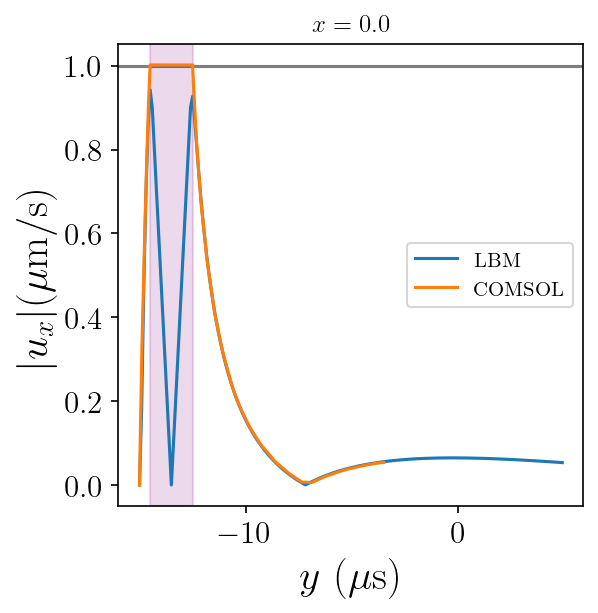

In [38]:
particleDf = pd.read_csv(dir+"particlesTrj.csv")
particleRadius = 1;

comsolResults = pd.read_csv('../data.lbm/VelocityProfile.csv', delimiter=',')

# encuentro el primer id_x tal que coordinate_x sea mayor o igual a la posición de la partícula
position_x = particleDf.query(f'tick == {tick}').position_x.values[0]
position_y = particleDf.query(f'tick == {tick}').position_y.values[0]
id = fluidDf.query(f"coordinate_x >= {position_x}").reset_index().iloc[0].filter(["id_x"]).values[0]

# ploteo v_x(y, x = 0)
v_x = fluidDf.loc[id].filter(["coordinate_y", "fluidVelocity_x"])

wallPosition = -15
plt.axhline(1, color = 'k', alpha=0.5) # tangential velocity (μm/ms)
plt.axvspan(position_y-particleRadius, position_y+particleRadius, color='purple', alpha=0.15)  # Shade the sphere

plt.plot(v_x.query('coordinate_y < 5').coordinate_y, 1e6*abs(v_x.query('coordinate_y < 5').fluidVelocity_x), label = "LBM") 
plt.plot(comsolResults.coordinate_y - 15, comsolResults.fluidVelocity_x, label = "COMSOL") 
plt.xlabel("$y ~ (\\mu \\mathrm{s})$")
plt.ylabel("$|u_x| (\\mu \\mathrm{m} / \\mathrm{s})$")
plt.title(f"$x = {fluidDf.query(f"id_x == {id}").iloc[0].filter(["coordinate_x"]).values[0]}$")
# plt.axvline(wallPosition, color = "k")
plt.legend()

plt.show()

In [7]:
def maxSpeed(df):
    return np.sqrt(df.fluidVelocity_x**2 + df.fluidVelocity_y**2).max()

maximumFluidSpeed = [
    maxSpeed(pd.read_csv(dir + f"fluidTrj_{tick}.csv"))
for tick in ticks]
time = [pd.read_csv(dir + f"fluidTrj_{tick}.csv").time.values[0] for tick in ticks]

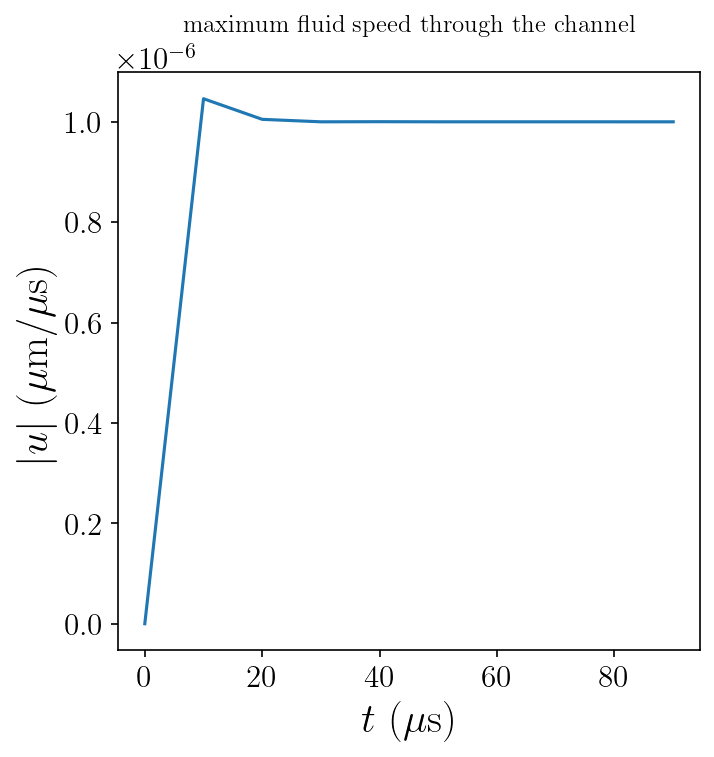

In [8]:
fig, ax = plt.subplots(figsize = (5,5))

ax.plot(time[0:10], maximumFluidSpeed[0:10])
ax.set_title("maximum fluid speed through the channel")
ax.set_xlabel("$t$ ($\\mu$s)")
ax.set_ylabel("$|u|$ ($\\mu$m/$\\mu$s)")

plt.show()

# Tensor de estrés

In [9]:
stressDf = pd.read_csv(dir + "stressTensor.csv").set_index(["id_x","id_y"]).sort_index()

stressDf

tick    time  coordinate_x  coordinate_y  component_xx  \
id_x id_y                                                            
1    1     10000  1000.0         -15.0         -15.0          -0.0   
     2     10000  1000.0         -15.0         -14.9          -0.0   
     3     10000  1000.0         -15.0         -14.8          -0.0   
     4     10000  1000.0         -15.0         -14.7          -0.0   
     5     10000  1000.0         -15.0         -14.6          -0.0   
...          ...     ...           ...           ...           ...   
301  297   10000  1000.0          15.0          14.6          -0.0   
     298   10000  1000.0          15.0          14.7          -0.0   
     299   10000  1000.0          15.0          14.8          -0.0   
     300   10000  1000.0          15.0          14.9          -0.0   
     301   10000  1000.0          15.0          15.0          -0.0   

           component_yx  component_xy  component_yy  
id_x id_y                                            
1    1             -0.0          -0.0          -0.0  
     2             -0.0          -0.0          -0.0  
     3             -0.0          -0.0          -0.0  
     4             -0.0          -0.0          -0.0  
     5             -0.0          -0.0          -0.0  
...                 ...           ...           ...  
301  297           -0.0          -0.0          -0.0  
     298           -0.0          -0.0          -0.0  
     299           -0.0          -0.0          -0.0  
     300           -0.0          -0.0          -0.0  
     301           -0.0          -0.0          -0.0  

[90601 rows x 8 columns]

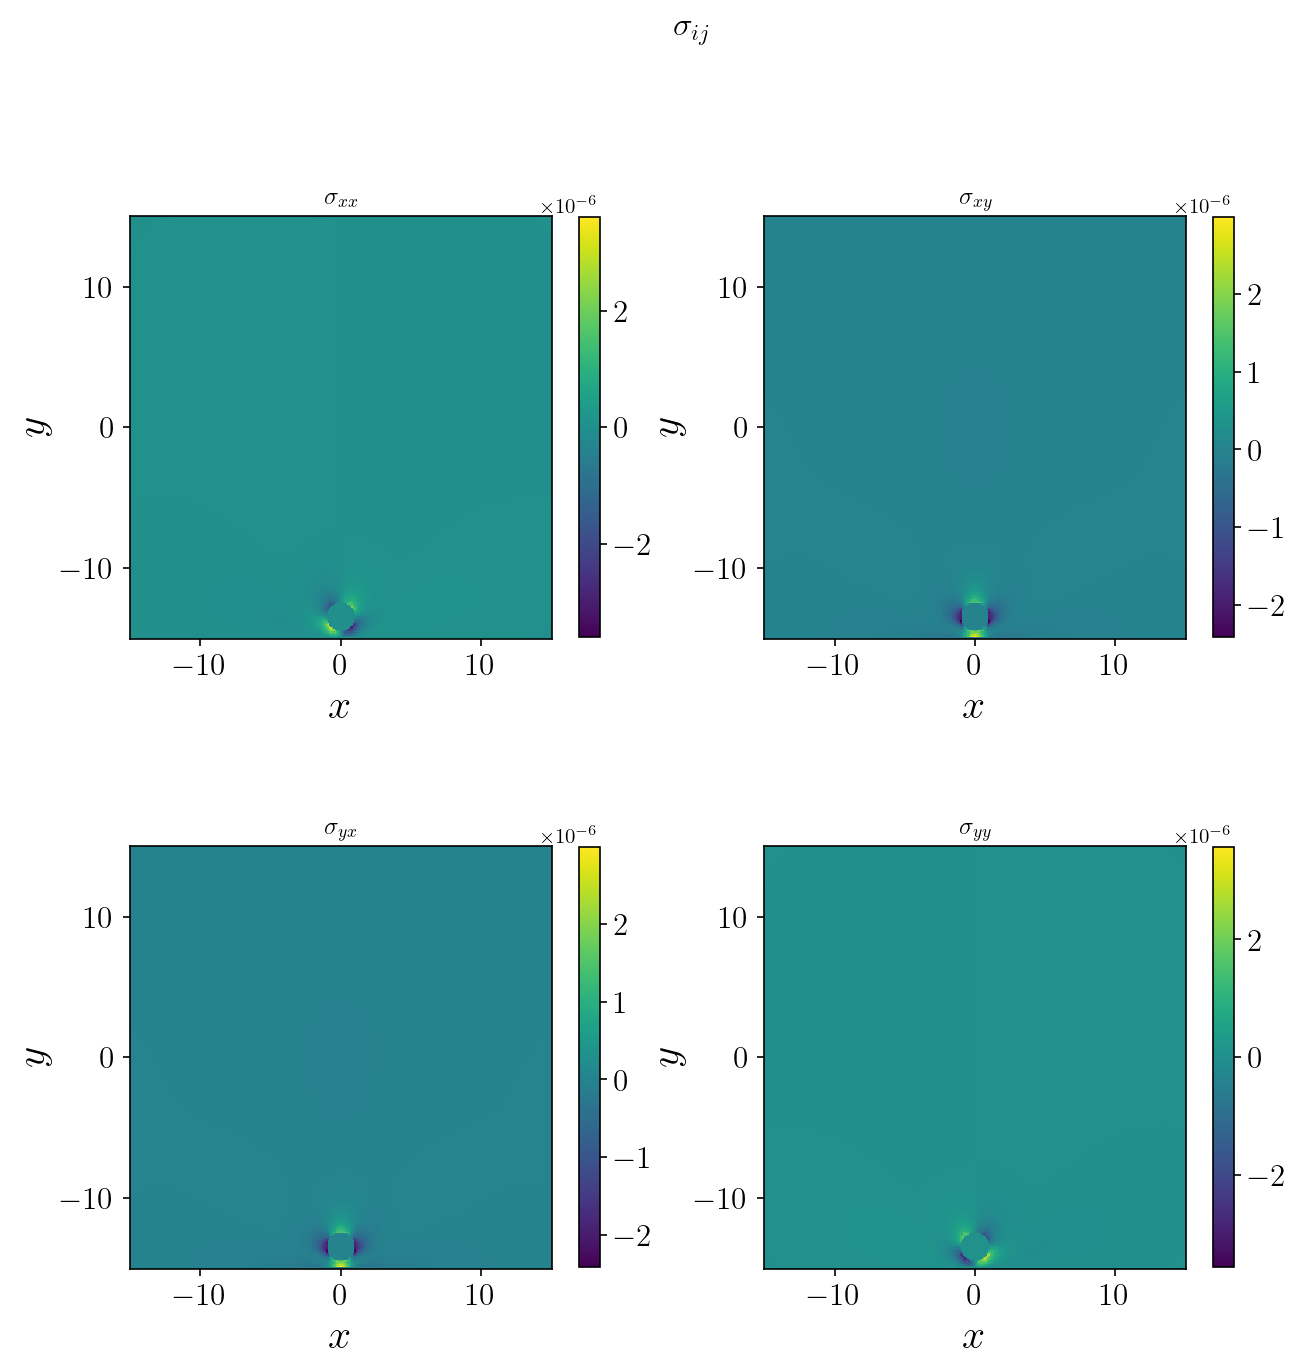

In [10]:
# setting up stuff
fig, axes = plt.subplots(2,2,figsize = (10,10))

# Add a title for the whole figure
fig.suptitle("$\\sigma_{ij}$", fontsize=16)

# Create a meshgrid for plotting
x_unique = stressDf['coordinate_x'].unique()
y_unique = stressDf['coordinate_y'].unique()
X, Y = np.meshgrid(x_unique, y_unique)

cs = []

# plotting
c = axes[0,0].pcolormesh(X,Y,stressDf["component_xx"].unstack().values.transpose()); cs.append(c);
axes[0,0].set_title("$\\sigma_{xx}$")

c = axes[0,1].pcolormesh(X,Y,stressDf["component_xy"].unstack().values.transpose()); cs.append(c);
axes[0,1].set_title("$\\sigma_{xy}$")

c = axes[1,0].pcolormesh(X,Y,stressDf["component_yx"].unstack().values.transpose()); cs.append(c);
axes[1,0].set_title("$\\sigma_{yx}$")

c = axes[1,1].pcolormesh(X,Y,stressDf["component_yy"].unstack().values.transpose()); cs.append(c);
axes[1,1].set_title("$\\sigma_{yy}$")


# for ax in axes.flat:
for i in range(4):
    ax = axes.flatten()[i]
    c = cs[i]
    ax.set_aspect('equal')
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")    
    cbar = fig.colorbar(c, ax=ax, shrink=.8)
    cbar.ax.yaxis.set_major_formatter(formatter)
    cbar.ax.yaxis.get_offset_text().set_fontsize(10)  # Adjust the font size if necessary
#     ax.axhline(wallPosition, color = "k", alpha = 0.1)
#     ax.axhspan(-2, wallPosition, color='gray', alpha=0.1)  # Shade the wall

plt.show()

In [ ]:
# # encuentro el primer id_x tal que coordinate_x sea mayor o igual a cero
# id = stressDf.query("coordinate_x >= 0").reset_index().iloc[0].filter(["id_x"]).values[0]

# # ploteo v_x(y, x = 0)
# sigma_x = stressDf.loc[id].filter(["coordinate_y", "component_xx", "component_xy", "component_yx", "component_yy"])


# # setting up stuff
# fig, axes = plt.subplots(2,2,figsize = (10,10))

# # Add a title for the whole figure
# fig.suptitle("$\\sigma_{ij}$, with " f"$x = {stressDf.query(f"id_x == {id}").iloc[0].filter(["coordinate_x"]).values[0]}$", fontsize=16)

# axes[0,0].plot(sigma_x.query("coordinate_y <= -3").coordinate_y, sigma_x.query("coordinate_y <= -3").component_xx) 
# axes[0,0].set_ylabel("$\\sigma_{xx}$")    
# axes[0,1].plot(sigma_x.query("coordinate_y <= -3").coordinate_y, sigma_x.query("coordinate_y <= -3").component_xy) 
# axes[0,1].set_ylabel("$\\sigma_{xy}$")    
# axes[1,0].plot(sigma_x.query("coordinate_y <= -3").coordinate_y, sigma_x.query("coordinate_y <= -3").component_yx) 
# axes[1,0].set_ylabel("$\\sigma_{yx}$")    
# axes[1,1].plot(sigma_x.query("coordinate_y <= -3").coordinate_y, sigma_x.query("coordinate_y <= -3").component_yy) 
# axes[1,1].set_ylabel("$\\sigma_{yy}$")    

# for ax in axes.flatten():
#     ax.set_xlabel("$y$")
#     ax.yaxis.set_major_formatter(formatter)
#     ax.axvline(wallPosition, color = "k")
#     ax.axvspan(-6+0.2, -6+1, color='purple', alpha=0.15)  # Shade the sphere

In [ ]:
# # encuentro el primer id_x tal que coordinate_x sea mayor o igual a cero
# id = stressDf.query("coordinate_y >= -5.4").reset_index().iloc[0].filter(["id_y"]).values[0]

# sigma_y = stressDf.query(f"id_y == {id}").filter(["coordinate_x", "component_xx", "component_xy", "component_yx", "component_yy"])


# # setting up stuff
# fig, axes = plt.subplots(2,2,figsize = (10,10))

# # Add a title for the whole figure
# fig.suptitle("$\\sigma_{ij}$, with " f"$y = {stressDf.query(f"id_y == {id}").iloc[0].filter(["coordinate_y"]).values[0]}$", fontsize=16)

# axes[0,0].plot(sigma_y.coordinate_x, sigma_y.component_xx) 
# axes[0,0].set_ylabel("$\\sigma_{xx}$")    
# axes[0,1].plot(sigma_y.coordinate_x, sigma_y.component_xy) 
# axes[0,1].set_ylabel("$\\sigma_{xy}$")    
# axes[1,0].plot(sigma_y.coordinate_x, sigma_y.component_yx) 
# axes[1,0].set_ylabel("$\\sigma_{yx}$")    
# axes[1,1].plot(sigma_y.coordinate_x, sigma_y.component_yy) 
# axes[1,1].set_ylabel("$\\sigma_{yy}$")    

# for ax in axes.flatten():
#     ax.set_xlabel("$x$")
#     ax.yaxis.set_major_formatter(formatter)
#     ax.axvspan(-0.4, 0.4, color='purple', alpha=0.15)  # Shade the sphere